<a href="https://colab.research.google.com/github/sibimathews3010/motor-fault-diagnosis/blob/main/DC_sIMPLE_gUIDED_CAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from google.colab.patches import cv2_imshow
import gc

In [ ]:
%pip install matplotlib seaborn

!pip install scikit-learn




In [ ]:

"""
# Define the LRP function
def lrp(model, X):
    # Placeholder implementation for LRP
    # This is a basic example, and you may need to adapt it based on your LRP variant

    # Convert to TensorFlow tensor
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)

    # Forward pass
    output = model(X_tensor)

    # Backward pass (gradient computation)
    with tf.GradientTape() as tape:
        tape.watch(X_tensor)
        prediction = model(X_tensor)

    gradient = tape.gradient(prediction, X_tensor)

    # Compute LRP scores
    lrp_scores = gradient * X_tensor

    return lrp_scores.numpy()

# Define the path to the directory containing the class folders
data_dir = '/content/drive/MyDrive/dataset  new approch'

# Define the image size for resizing
image_size = (224, 224)  # VGG16 input size

# Define the class labels
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11']

# Load the dataset
data = []
labels = []
for i, class_label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, class_label)
    for image_file in os.listdir(class_dir):
        if image_file.endswith('.bmp'):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path)

            # Resize the image
            resized_image = cv2.resize(image, image_size)

            data.append(resized_image)
            labels.append(i)

# Convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Shuffle the dataset
data, labels = shuffle(data, labels, random_state=42)

# Calculate class sample counts
class_sample_counts = {class_label: np.sum(labels == i) for i, class_label in enumerate(class_labels)}


# Preprocess the input images for VGG16
data = preprocess_input(data)

# Load the pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Initialize LRP directory
lrp_data_dir = '/content/drive/MyDrive/LRPDataset'
os.makedirs(lrp_data_dir, exist_ok=True)

# Load the dataset
for class_label in class_labels:
    class_dir = os.path.join(data_dir, class_label)
    for image_file in os.listdir(class_dir):
        if image_file.endswith('.bmp'):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path)

            # Resize the image
            resized_image = cv2.resize(image, image_size)

            # Generate LRP scores
            lrp_scores = lrp(vgg16_model, np.expand_dims(resized_image, axis=0))

            # Save LRP scores
            lrp_class_dir = os.path.join(lrp_data_dir, class_label)
            os.makedirs(lrp_class_dir, exist_ok=True)
            lrp_scores_path = os.path.join(lrp_class_dir, image_file.replace('.bmp', '_lrp.npy'))
            np.save(lrp_scores_path, lrp_scores)

            # Release memory
            del image, resized_image, lrp_scores
            gc.collect()  # Manually trigger garbage collection
# Print the number of samples in each class
print("Class Sample Counts:")
for class_label, sample_count in class_sample_counts.items():
    print(f"{class_label}: {sample_count} samples")
print("LRP dataset generation completed.")
"""

'\n# Define the LRP function\ndef lrp(model, X):\n    # Placeholder implementation for LRP\n    # This is a basic example, and you may need to adapt it based on your LRP variant\n\n    # Convert to TensorFlow tensor\n    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)\n\n    # Forward pass\n    output = model(X_tensor)\n\n    # Backward pass (gradient computation)\n    with tf.GradientTape() as tape:\n        tape.watch(X_tensor)\n        prediction = model(X_tensor)\n\n    gradient = tape.gradient(prediction, X_tensor)\n\n    # Compute LRP scores\n    lrp_scores = gradient * X_tensor\n\n    return lrp_scores.numpy()\n\n# Define the path to the directory containing the class folders\ndata_dir = \'/content/drive/MyDrive/dataset  new approch\'\n\n# Define the image size for resizing\nimage_size = (224, 224)  # VGG16 input size\n\n# Define the class labels\nclass_labels = [\'class1\', \'class2\', \'class3\', \'class4\', \'class5\', \'class6\', \'class7\', \'class8\', \'class9\', \'cl

In [ ]:


# Define the LRP function
def lrp(model, X):
    # Placeholder implementation for LRP
    # This is a basic example, and you may need to adapt it based on your LRP variant

    # Convert to TensorFlow tensor
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)

    # Forward pass
    output = model(X_tensor)

    # Backward pass (gradient computation)
    with tf.GradientTape() as tape:
        tape.watch(X_tensor)
        prediction = model(X_tensor)

    gradient = tape.gradient(prediction, X_tensor)

    # Compute LRP scores
    lrp_scores = gradient * X_tensor

    return lrp_scores.numpy()

# Define the path to the directory containing the class folders
data_dir = '/content/drive/MyDrive/dataset  new approch'

# Define the image size for resizing
image_size = (224, 224)  # VGG16 input size

# Define the class labels
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11']

# Load the dataset
data = []
labels = []
for i, class_label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, class_label)
    for image_file in os.listdir(class_dir):
        if image_file.endswith('.bmp'):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path)

            # Resize the image
            resized_image = cv2.resize(image, image_size)

            data.append(resized_image)
            labels.append(i)

# Convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Shuffle the dataset
data, labels = shuffle(data, labels, random_state=42)

# Calculate class sample counts
class_sample_counts = {class_label: np.sum(labels == i) for i, class_label in enumerate(class_labels)}


# Preprocess the input images for VGG16
data = preprocess_input(data)

# Load the pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Initialize LRP directory
lrp_data_dir = '/content/drive/MyDrive/LRPDataset'
os.makedirs(lrp_data_dir, exist_ok=True)

# Initialize lrp_labels based on the number of images in each class
lrp_labels = np.zeros((len(data), len(class_labels)))

# Load the dataset
for i, class_label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, class_label)
    for j, image_file in enumerate(os.listdir(class_dir)):
        if image_file.endswith('.bmp'):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path)

            # Resize the image
            resized_image = cv2.resize(image, image_size)

            # Generate LRP scores
            lrp_scores = lrp(vgg16_model, np.expand_dims(resized_image, axis=0))

            # Save LRP scores
            lrp_class_dir = os.path.join(lrp_data_dir, class_label)
            os.makedirs(lrp_class_dir, exist_ok=True)
            lrp_scores_path = os.path.join(lrp_class_dir, image_file.replace('.bmp', '_lrp.npy'))
            np.save(lrp_scores_path, lrp_scores)

            # Update lrp_labels based on the length of LRP scores
            lrp_labels[j, i] = 1

            # Release memory
            del image, resized_image, lrp_scores
            gc.collect()  # Manually trigger garbage collection

# Print the number of samples in each class
print("Class Sample Counts:")
for class_label, sample_count in class_sample_counts.items():
    print(f"{class_label}: {sample_count} samples")
print("LRP dataset generation completed.")


58889256/58889256 [==============================] - 1s 0us/step
Class Sample Counts:
class1: 38 samples
class2: 31 samples
class3: 42 samples
class4: 31 samples
class5: 38 samples
class6: 34 samples
class7: 37 samples
class8: 35 samples
class9: 28 samples
class10: 25 samples
class11: 30 samples
LRP dataset generation completed.


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from google.colab.patches import cv2_imshow

In [ ]:

# Define the path to the directory containing the class folders
data_dir = '/content/drive/MyDrive/dataset  new approch'

# Define the image size for resizing
image_size = (224, 224)  # VGG16 input size

# Define the class labels
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11']

# Load the dataset
data = []
labels = []
for i, class_label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, class_label)
    for image_file in os.listdir(class_dir):
        if image_file.endswith('.bmp'):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path)

            # Resize the image
            resized_image = cv2.resize(image, image_size)

            data.append(resized_image)
            labels.append(i)

# Convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Shuffle the dataset
data, labels = shuffle(data, labels, random_state=42)

# Preprocess the input images for VGG16
data = preprocess_input(data)

# Load the pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Extract features from the pre-trained model
features = vgg16_model.predict(data)

# Initialize Guided Grad-CAM directory
guided_cam_data_dir = '/content/drive/MyDrive/GuidedCamDataset'
os.makedirs(guided_cam_data_dir, exist_ok=True)




12/12 [==============================] - 273s 21s/step


In [ ]:
def get_grad_cam(model, image, class_index, layer_name):
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    return heatmap.numpy()


In [ ]:
def generate_guided_grad_cam(image, last_conv_layer_name='block5_conv3'):
    # Load VGG16 model with pre-trained weights
    vgg16_model = VGG16(weights='imagenet')
    vgg16_model.layers[-1].activation = tf.keras.activations.softmax

    # Preprocess the image for VGG16
    preprocessed_image = preprocess_input(image)

    # Get the class index for the predicted class
    class_index = np.argmax(vgg16_model.predict(np.expand_dims(preprocessed_image, axis=0))[0])

    # Generate the Grad-CAM heatmap
    heatmap = get_grad_cam(vgg16_model, np.expand_dims(preprocessed_image, axis=0), class_index, last_conv_layer_name)

    # Resize the heatmap to match the image size
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # Convert heatmap to BGR for visualization
    heatmap_bgr = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    # Overlay the heatmap on the original image
    superimposed_image = cv2.addWeighted(image, 0.6, heatmap_bgr, 0.4, 0)

    return superimposed_image

In [ ]:
import gc

In [ ]:
# Load the dataset
for class_label in class_labels:
    class_dir = os.path.join(data_dir, class_label)
    for image_file in os.listdir(class_dir):
        if image_file.endswith('.bmp'):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path)

            # Resize the image
            resized_image = cv2.resize(image, image_size)

            # Generate Guided Grad-CAM image
            guided_cam_image = generate_guided_grad_cam(resized_image)

            # Save Guided Grad-CAM image
            guided_cam_class_dir = os.path.join(guided_cam_data_dir, class_label)
            os.makedirs(guided_cam_class_dir, exist_ok=True)
            guided_cam_image_path = os.path.join(guided_cam_class_dir, image_file)
            cv2.imwrite(guided_cam_image_path, guided_cam_image)

            # Release memory
            del image, resized_image, guided_cam_image
            gc.collect()  # Manually trigger garbage collection
# Print the number of samples in each class
print("Class Sample Counts:")
for class_label, sample_count in class_sample_counts.items():
    print(f"{class_label}: {sample_count} samples")
print("Guided Grad-CAM dataset generation completed.")

1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 757ms/step
Class Sample Counts:
class1: 38 samples
class2: 31 samples
class3: 42 samples
class4: 31 samples
class5: 38 samples
class6: 34 samples
class7: 37 samples
class8: 35 samples
class9: 28 samples
class10: 25 samples
class11: 30 samples
Guided Grad-CAM dataset generation completed.


In [ ]:
"""""
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the class labels
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11']

# Define paths
guided_cam_data_dir = '/content/drive/MyDrive/GuidedCamDataset'
lrp_data_dir = '/content/drive/MyDrive/LRPDataset'

# Load Guided Grad-CAM data
guided_data = []
for class_label in class_labels:
    class_dir = os.path.join(guided_cam_data_dir, class_label)
    guided_samples = []
    for image_file in os.listdir(class_dir):
        if image_file.endswith('.bmp'):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (224, 224))  # Resize if necessary
            guided_samples.append(resized_image)
    if guided_samples:
        guided_data.extend(guided_samples)

# Convert Guided Grad-CAM data to NumPy array
guided_data = np.array(guided_data)

# Load LRP data
lrp_data = []
problematic_files = []

for class_label in class_labels:
    class_dir = os.path.join(lrp_data_dir, class_label)
    lrp_samples = []
    for image_file in os.listdir(class_dir):
        if image_file.endswith('_lrp.npy'):
            lrp_path = os.path.join(class_dir, image_file)
            try:
                lrp = np.load(lrp_path, allow_pickle=True)
                # Ensure LRP data has the same number of dimensions as Guided Grad-CAM data
                if len(lrp.shape) > 3:
                    lrp = np.squeeze(lrp, axis=0)
                # Resize LRP data to match the dimensions of Guided Grad-CAM data
                resized_lrp = cv2.resize(lrp, (224, 224))
                lrp_samples.append(resized_lrp)
            except Exception as e:
                print(f"Error loading file {lrp_path}: {e}")
                problematic_files.append(lrp_path)
    if lrp_samples:
        lrp_data.extend(lrp_samples)

# Print the list of problematic files
print("Problematic Files:", problematic_files)

# Convert LRP data to NumPy array
lrp_data = np.array(lrp_data)

# Ensure both datasets have the same number of samples
min_samples = min(guided_data.shape[0], lrp_data.shape[0])
guided_data = guided_data[:min_samples]
lrp_data = lrp_data[:min_samples]

# Combine LRP data and Guided Grad-CAM data
combined_data = np.concatenate([lrp_data, guided_data], axis=-1)

# Create dummy labels for training (since we don't have pixel-wise labels)
combined_train_labels = np.zeros((combined_data.shape[0], len(class_labels)))

# Convert labels to categorical (one-hot encoding)
combined_train_labels = to_categorical(combined_train_labels.argmax(axis=1), num_classes=len(class_labels))

# Split the combined dataset into training and testing sets
combined_train_data, combined_test_data, combined_train_labels, combined_test_labels = train_test_split(
    combined_data, combined_train_labels, test_size=0.2, random_state=42)
# Normalize pixel values
combined_train_data = combined_train_data / 255.0
combined_test_data = combined_test_data / 255.0

# Model with dropout layers for regularization and lower learning rate
classification_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, combined_data.shape[-1])),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])

# Compile the model with a lower learning rate
classification_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classification model with dropout
classification_model.fit(combined_train_data, combined_train_labels, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the classification model on the test set
test_accuracy_classification = classification_model.evaluate(combined_test_data, combined_test_labels)
print(f'Test Accuracy (Classification Model): {test_accuracy_classification[1]:.4f}')

"""""

'""\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras.layers import Dropout\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense\nfrom tensorflow.keras.utils import to_categorical\nimport os\nimport cv2\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\n\n# Define the class labels\nclass_labels = [\'class1\', \'class2\', \'class3\', \'class4\', \'class5\', \'class6\', \'class7\', \'class8\', \'class9\', \'class10\', \'class11\']\n\n# Define paths\nguided_cam_data_dir = \'/content/drive/MyDrive/GuidedCamDataset\'\nlrp_data_dir = \'/content/drive/MyDrive/LRPDataset\'\n\n# Load Guided Grad-CAM data\nguided_data = []\nfor class_label in class_labels:\n    class_dir = os.path.join(guided_cam_data_dir, class_label)\n    guided_samples = []\n    for image_file in os.listdir(class_dir):\n        if image_file.endswith(\'.bmp\'):\n            image_path = os.path.join(class_dir, image

In [ ]:

#error code
""""
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the class labels
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11']

# Define paths
guided_cam_data_dir = '/content/drive/MyDrive/GuidedCamDataset'
lrp_data_dir = '/content/drive/MyDrive/LRPDataset'

# Load Guided Grad-CAM data
guided_data = []
for class_label in class_labels:
    class_dir = os.path.join(guided_cam_data_dir, class_label)
    guided_samples = []
    for image_file in os.listdir(class_dir):
        if image_file.endswith('.bmp'):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (224, 224))  # Resize if necessary
            guided_samples.append(resized_image)
    if guided_samples:
        guided_data.extend(guided_samples)

# Convert Guided Grad-CAM data to NumPy array
guided_data = np.array(guided_data)

# Load LRP data
lrp_data = []
problematic_files = []

for class_label in class_labels:
    class_dir = os.path.join(lrp_data_dir, class_label)
    lrp_samples = []
    for image_file in os.listdir(class_dir):
        if image_file.endswith('_lrp.npy'):
            lrp_path = os.path.join(class_dir, image_file)
            try:
                lrp = np.load(lrp_path, allow_pickle=True)
                # Ensure LRP data has the same number of dimensions as Guided Grad-CAM data
                if len(lrp.shape) > 3:
                    lrp = np.squeeze(lrp, axis=0)
                # Resize LRP data to match the dimensions of Guided Grad-CAM data
                resized_lrp = cv2.resize(lrp, (224, 224))
                lrp_samples.append(resized_lrp)
            except Exception as e:
                print(f"Error loading file {lrp_path}: {e}")
                problematic_files.append(lrp_path)
    if lrp_samples:
        lrp_data.extend(lrp_samples)

# Print the list of problematic files
print("Problematic Files:", problematic_files)

# Convert LRP data to NumPy array
lrp_data = np.array(lrp_data)

# Ensure both datasets have the same number of samples
min_samples = min(guided_data.shape[0], lrp_data.shape[0])
guided_data = guided_data[:min_samples]
lrp_data = lrp_data[:min_samples]

# Combine LRP data and Guided Grad-CAM data class by class
combined_data = []
combined_labels = []

for idx, class_label in enumerate(class_labels):
    # Select samples for the current class from LRP and Guided Grad-CAM datasets
    class_lrp_data = lrp_data[lrp_data[:, :, :, idx] == 1]
    class_guided_data = guided_data[lrp_data[:, :, :, idx] == 1]

    # Print shapes for debugging
    print(f"Class {class_label} - LRP Data Shape: {class_lrp_data.shape}, Guided Data Shape: {class_guided_data.shape}")

    # Combine LRP and Guided Grad-CAM data for the current class
    class_combined_data = np.concatenate([class_lrp_data, class_guided_data], axis=-1)

    # Create labels for the current class
    class_labels_one_hot = to_categorical(np.zeros(class_combined_data.shape[0]), num_classes=len(class_labels)).astype(int)

    # Append to the overall combined data and labels
    combined_data.append(class_combined_data)
    combined_labels.append(class_labels_one_hot)

# Concatenate the lists to get the final combined data and labels
combined_data = np.concatenate(combined_data)
combined_labels = np.concatenate(combined_labels)

# Split the combined dataset into training and testing sets
combined_train_data, combined_test_data, combined_train_labels, combined_test_labels = train_test_split(
    combined_data, combined_labels, test_size=0.2, stratify=combined_labels, random_state=42
)

# Normalize pixel values
combined_train_data = combined_train_data / 255.0
combined_test_data = combined_test_data / 255.0

# Model with dropout layers for regularization and lower learning rate
classification_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, combined_data.shape[-1])),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])

# Compile the model with a lower learning rate
classification_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classification model with dropout
classification_model.fit(combined_train_data, combined_train_labels, epochs=20, batch_size=32, validation_split=0.1)

# Predict class probabilities using softmax classifier
test_probabilities_softmax = classification_model.predict(combined_test_data)
# Print the raw predicted probabilities
print("Raw Predicted Probabilities:")
print(test_probabilities_softmax)
# Get the predicted class labels
test_predictions_softmax = np.argmax(test_probabilities_softmax, axis=1)

# Print the predicted class labels and true labels
print("Predicted Class Indices:", test_predictions_softmax)
print("True Class Indices:", np.argmax(combined_test_labels, axis=1))

# Calculate accuracy
test_accuracy_softmax = accuracy_score(np.argmax(combined_test_labels, axis=1), test_predictions_softmax)
print(f'Test Accuracy (Softmax Classifier using CNN Features): {test_accuracy_softmax:.4f}')
"""

'"\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras.layers import Dropout\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense\nfrom tensorflow.keras.utils import to_categorical\nimport os\nimport cv2\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\n# Define the class labels\nclass_labels = [\'class1\', \'class2\', \'class3\', \'class4\', \'class5\', \'class6\', \'class7\', \'class8\', \'class9\', \'class10\', \'class11\']\n\n# Define paths\nguided_cam_data_dir = \'/content/drive/MyDrive/GuidedCamDataset\'\nlrp_data_dir = \'/content/drive/MyDrive/LRPDataset\'\n\n# Load Guided Grad-CAM data\nguided_data = []\nfor class_label in class_labels:\n    class_dir = os.path.join(guided_cam_data_dir, class_label)\n    guided_samples = []\n    for image_file in os.listdir(class_dir):\n        if image_file.endswith(\'.bmp\'):\n           

In [ ]:
import os
import cv2
import numpy as np

# Define the class labels
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11']

# Define paths
guided_cam_data_dir = '/content/drive/MyDrive/GuidedCamDataset'
lrp_data_dir = '/content/drive/MyDrive/LRPDataset'

# Output folder for the combined dataset
output_folder = '/content/drive/MyDrive/CombinedDataset'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Load Guided Grad-CAM data
guided_data = []
for class_label in class_labels:
    class_dir = os.path.join(guided_cam_data_dir, class_label)
    for image_file in os.listdir(class_dir):
        if image_file.endswith('.bmp'):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (224, 224))  # Resize if necessary
            guided_data.append(resized_image)

# Load LRP data and combine with Guided Grad-CAM data
combined_data = []
combined_labels = []

for class_label in class_labels:
    class_dir_guided = os.path.join(guided_cam_data_dir, class_label)
    class_dir_lrp = os.path.join(lrp_data_dir, class_label)

    for image_file_guided in os.listdir(class_dir_guided):
        if image_file_guided.endswith('.bmp'):
            image_path_guided = os.path.join(class_dir_guided, image_file_guided)
            image_guided = cv2.imread(image_path_guided)
            resized_image_guided = cv2.resize(image_guided, (224, 224))  # Resize if necessary

            # Form the file name for LRP data based on the Guided Grad-CAM file
            image_file_lrp = image_file_guided.replace('.bmp', '_lrp.npy')
            lrp_path = os.path.join(class_dir_lrp, image_file_lrp)

            try:
                lrp = np.load(lrp_path, allow_pickle=True)
                # Ensure LRP data has the same number of dimensions as Guided Grad-CAM data
                if len(lrp.shape) > 3:
                    lrp = np.squeeze(lrp, axis=0)
                # Resize LRP data to match the dimensions of Guided Grad-CAM data
                resized_lrp = cv2.resize(lrp, (224, 224))

                # Combine Guided Grad-CAM and LRP datasets element-wise
                combined_sample = np.concatenate([resized_image_guided, resized_lrp], axis=-1)
                combined_data.append(combined_sample)
                combined_labels.append(class_label)
            except Exception as e:
                print(f"Error loading file {lrp_path}: {e}")

# Convert lists to NumPy arrays
combined_data = np.array(combined_data)
combined_labels = np.array(combined_labels)

# Save the combined data and labels
output_data_path = os.path.join(output_folder, 'combined_data.npy')
output_labels_path = os.path.join(output_folder, 'combined_labels.npy')

np.save(output_data_path, combined_data)
np.save(output_labels_path, combined_labels)

# Display completion message
print("Dataset generation complete.")
print("Combined dataset saved to:")
print("Data:", output_data_path)
print("Labels:", output_labels_path)

# Display count of elements in each class
for class_label in class_labels:
    class_count = np.sum(combined_labels == class_label)
    print(f"Class {class_label}: {class_count} elements")


Dataset generation complete.
Combined dataset saved to:
Data: /content/drive/MyDrive/CombinedDataset/combined_data.npy
Labels: /content/drive/MyDrive/CombinedDataset/combined_labels.npy
Class class1: 38 elements
Class class2: 31 elements
Class class3: 42 elements
Class class4: 31 elements
Class class5: 38 elements
Class class6: 34 elements
Class class7: 37 elements
Class class8: 35 elements
Class class9: 28 elements
Class class10: 25 elements
Class class11: 30 elements


In [ ]:
"""
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Load the data and labels
combined_data = np.load('/content/drive/MyDrive/CombinedDataset/combined_data.npy')
combined_labels = np.load('/content/drive/MyDrive/CombinedDataset/combined_labels.npy')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_data, combined_labels, test_size=0.2, random_state=42)

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build a new model on top of VGG16
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))  # Separate activation layer
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation='softmax'))

# Compile the model with a custom learning rate and disable fused convolution
optimizer = optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with augmented data and learning rate scheduling
model.fit(datagen.flow(X_train, y_train_encoded, batch_size=32), epochs=20, validation_data=(X_test, y_test_encoded), callbacks=[lr_schedule, early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_acc}")
"""

'\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import OneHotEncoder\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\nfrom tensorflow.keras import layers, models, optimizers\nfrom tensorflow.keras.applications import VGG16\nfrom tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping\n\n# Load the data and labels\ncombined_data = np.load(\'/content/drive/MyDrive/CombinedDataset/combined_data.npy\')\ncombined_labels = np.load(\'/content/drive/MyDrive/CombinedDataset/combined_labels.npy\')\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(combined_data, combined_labels, test_size=0.2, random_state=42)\n\n# One-hot encode the labels\nencoder = OneHotEncoder(sparse=False)\ny_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))\ny_test_encoded = encoder.transform(y_test.reshape(-1, 1))\n\n# Data Augmentation\ndatagen = ImageDataGenerator(

In [ ]:
"""# Generate classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

classification_rep = classification_report(y_true_classes, y_pred_classes, target_names=['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11'])
print("Classification Report:\n", classification_rep)
"""

'# Generate classification report\ny_pred = model.predict(X_test)\ny_pred_classes = np.argmax(y_pred, axis=1)\ny_true_classes = np.argmax(y_test_encoded, axis=1)\n\nclassification_rep = classification_report(y_true_classes, y_pred_classes, target_names=[\'class1\', \'class2\', \'class3\', \'class4\', \'class5\', \'class6\', \'class7\', \'class8\', \'class9\', \'class10\', \'class11\'])\nprint("Classification Report:\n", classification_rep)\n'

In [ ]:
"""# Load the combined dataset
loaded_combined_data = np.load(output_data_path)

# Display the shape of the loaded array
print("Shape of loaded combined data:", loaded_combined_data.shape)"""


'# Load the combined dataset\nloaded_combined_data = np.load(output_data_path)\n\n# Display the shape of the loaded array\nprint("Shape of loaded combined data:", loaded_combined_data.shape)'

In [ ]:
#print("Class Labels:", class_labels)


In [ ]:
"""from sklearn.metrics import classification_report

# ... (your existing code)

# Generate the classification report
class_report = classification_report(
    np.argmax(combined_test_labels, axis=1),
    test_predictions_softmax,
    labels=np.arange(len(class_labels)),
    target_names=class_labels,
    zero_division=1  # Set zero_division to 1 to avoid division by zero warnings
)

# Print the classification report
print('Classification Report:')
print(class_report)"""


"from sklearn.metrics import classification_report\n\n# ... (your existing code)\n\n# Generate the classification report\nclass_report = classification_report(\n    np.argmax(combined_test_labels, axis=1),\n    test_predictions_softmax,\n    labels=np.arange(len(class_labels)),\n    target_names=class_labels,\n    zero_division=1  # Set zero_division to 1 to avoid division by zero warnings\n)\n\n# Print the classification report\nprint('Classification Report:')\nprint(class_report)"

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the class labels
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11']

# Define paths
guided_cam_data_dir = '/content/drive/MyDrive/GuidedCamDataset'
lrp_data_dir = '/content/drive/MyDrive/LRPDataset'

# Load Guided Grad-CAM data
guided_data = []
for class_label in class_labels:
    class_dir = os.path.join(guided_cam_data_dir, class_label)
    guided_samples = []
    for image_file in os.listdir(class_dir):
        if image_file.endswith('.bmp'):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, (224, 224))  # Resize if necessary
            guided_samples.append(resized_image)
    if guided_samples:
        guided_data.extend(guided_samples)

# Convert Guided Grad-CAM data to NumPy array
guided_data = np.array(guided_data)

# Load LRP data
lrp_data = []
problematic_files = []

for class_label in class_labels:
    class_dir = os.path.join(lrp_data_dir, class_label)
    lrp_samples = []
    for image_file in os.listdir(class_dir):
        if image_file.endswith('_lrp.npy'):
            lrp_path = os.path.join(class_dir, image_file)
            try:
                lrp = np.load(lrp_path, allow_pickle=True)
                # Ensure LRP data has the same number of dimensions as Guided Grad-CAM data
                if len(lrp.shape) > 3:
                    lrp = np.squeeze(lrp, axis=0)
                # Resize LRP data to match the dimensions of Guided Grad-CAM data
                resized_lrp = cv2.resize(lrp, (224, 224))
                lrp_samples.append(resized_lrp)
            except Exception as e:
                print(f"Error loading file {lrp_path}: {e}")
                problematic_files.append(lrp_path)
    if lrp_samples:
        lrp_data.extend(lrp_samples)

# Print the list of problematic files
print("Problematic Files:", problematic_files)

# Convert LRP data to NumPy array
lrp_data = np.array(lrp_data)

# Ensure both datasets have the same number of samples
min_samples = min(guided_data.shape[0], lrp_data.shape[0])
guided_data = guided_data[:min_samples]
lrp_data = lrp_data[:min_samples]

# Combine LRP data and Guided Grad-CAM data
combined_data = np.concatenate([lrp_data, guided_data], axis=-1)

# Create dummy labels for training (since we don't have pixel-wise labels)
combined_train_labels = np.zeros((combined_data.shape[0], len(class_labels)))

# Convert labels to categorical (one-hot encoding)
combined_train_labels = to_categorical(combined_train_labels.argmax(axis=1), num_classes=len(class_labels))

# Split the combined dataset into training and testing sets
combined_train_data, combined_test_data, combined_train_labels, combined_test_labels = train_test_split(
    combined_data, combined_train_labels, test_size=0.2, random_state=42)

# Model
classification_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, combined_data.shape[-1])),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_labels), activation='softmax')
])

# Compile the model
classification_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
classification_model.summary()

# Train the classification model
classification_model.fit(combined_train_data, combined_train_labels, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the classification model on the test set
test_accuracy_classification = classification_model.evaluate(combined_test_data, combined_test_labels)
print(f'Test Accuracy (Classification Model): {test_accuracy_classification[1]:.4f}')


Problematic Files: []
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      1760      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None

In [ ]:
##from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#from tensorflow.keras.utils import to_categorical
#import os
#import cv2
#import numpy as np
#from sklearn.model_selection import train_test_split

# Define the class labels
#class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11']

# Define paths
#guided_cam_data_dir = '/content/drive/MyDrive/GuidedCamDataset'
#lrp_data_dir = '/content/drive/MyDrive/LRPDataset'

# Load Guided Grad-CAM data
#guided_data = []
#for class_label in class_labels:
    #class_dir = os.path.join(guided_cam_data_dir, class_label)
    #guided_samples = []
    #for image_file in os.listdir(class_dir):
        #if image_file.endswith('.bmp'):
            #image_path = os.path.join(class_dir, image_file)
            #image = cv2.imread(image_path)
           # resized_image = cv2.resize(image, (224, 224))  # Resize if necessary
            #guided_samples.append(resized_image)
    #if guided_samples:
       ## guided_data.extend(guided_samples)

# Convert Guided Grad-CAM data to NumPy array
#guided_data = np.array(guided_data)

# Load LRP data
#lrp_data = []
#problematic_files = []

#for class_label in class_labels:
    #class_dir = os.path.join(lrp_data_dir, class_label)
    #lrp_samples = []
    #for image_file in os.listdir(class_dir):
        #if image_file.endswith('_lrp.npy'):
           # lrp_path = os.path.join(class_dir, image_file)
           # try:
               # lrp = np.load(lrp_path, allow_pickle=True)
                # Ensure LRP data has the same number of dimensions as Guided Grad-CAM data
                #if len(lrp.shape) > 3:
                  #  lrp = np.squeeze(lrp, axis=0)
                # Resize LRP data to match the dimensions of Guided Grad-CAM data
               # resized_lrp = cv2.resize(lrp, (224, 224))
                #lrp_samples.append(resized_lrp)
            #except Exception as e:
               # print(f"Error loading file {lrp_path}: {e}")
              #  problematic_files.append(lrp_path)
   # if lrp_samples:
      ##  lrp_data.extend(lrp_samples)

# Print the list of problematic files
#print("Problematic Files:", problematic_files)

# Convert LRP data to NumPy array
#lrp_data = np.array(lrp_data)

# Ensure both datasets have the same number of samples
#min_samples = min(guided_data.shape[0], lrp_data.shape[0])
#guided_data = guided_data[:min_samples]
#lrp_data = lrp_data[:min_samples]

# Combine LRP data and Guided Grad-CAM data
#combined_data = np.concatenate([lrp_data, guided_data], axis=-1)

# Create dummy labels for training (since we don't have pixel-wise labels)
#combined_train_labels = np.zeros((combined_data.shape[0], len(class_labels)))

# Convert labels to categorical (one-hot encoding)
#combined_train_labels = to_categorical(combined_train_labels.argmax(axis=1), num_classes=len(class_labels))

# Split the combined dataset into training and testing sets
#combined_train_data, combined_test_data, combined_train_labels, combined_test_labels = train_test_split(
    #combined_data, combined_train_labels, test_size=0.2, random_state=42)

# Model
#lassification_model = Sequential([
    #Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, combined_data.shape[-1])),
    #MaxPooling2D((2, 2)),
    #Conv2D(64, (3, 3), activation='relu'),
    #MaxPooling2D((2, 2)),
    #Flatten(),
    #Dense(128, activation='relu'),
    #Dense(len(class_labels), activation='softmax')
#])

# Compile the model
#classification_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
#classification_model.summary()

# Train the classification model
#classification_model.fit(combined_train_data, combined_train_labels, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the classification model on the test set
#test_accuracy_classification = classification_model.evaluate(combined_test_data, combined_test_labels)
#print(f'Test Accuracy (Classification Model): {test_accuracy_classification[1]:.4f}')


In [ ]:

#good
# Define the LRP function
def compute_lrp(model, X):
    # Placeholder implementation for LRP
    # This is a basic example, and you may need to adapt it based on your LRP variant

    # Convert to TensorFlow tensor
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)

    # Forward pass
    output = model(X_tensor)

    # Backward pass (gradient computation)
    with tf.GradientTape() as tape:
        tape.watch(X_tensor)
        prediction = model(X_tensor)

    gradient = tape.gradient(prediction, X_tensor)

    # Compute LRP scores
    lrp_scores = gradient * X_tensor

    return lrp_scores.numpy()

In [ ]:
!pip install deepexplain


ERROR: Could not find a version that satisfies the requirement deepexplain (from versions: none)
ERROR: No matching distribution found for deepexplain


In [ ]:
"""import tensorflow as tf
from deepexplain.tensorflow import DeepExplain
from tensorflow.keras.models import Model
from deepexplain.tensorflow import DeepExplain

def compute_lrp(model, X):
    with DeepExplain(session=tf.keras.backend.get_session()) as de:
        input_tensor = model.layers[0].input
        fModel = Model(inputs=input_tensor, outputs=model.layers[-1].output)

        # LRP with DeepExplain
        attributions = de.explain('lrp', fModel, X)

    return attributions

"""

"import tensorflow as tf\nfrom deepexplain.tensorflow import DeepExplain\nfrom tensorflow.keras.models import Model\nfrom deepexplain.tensorflow import DeepExplain\n\ndef compute_lrp(model, X):\n    with DeepExplain(session=tf.keras.backend.get_session()) as de:\n        input_tensor = model.layers[0].input\n        fModel = Model(inputs=input_tensor, outputs=model.layers[-1].output)\n\n        # LRP with DeepExplain\n        attributions = de.explain('lrp', fModel, X)\n\n    return attributions\n\n"

In [ ]:
# Load the test image (replace 'test_image_path' with the actual path to your test image)
test_image_path = '/content/drive/MyDrive/215.bmp'  # Replace with your actual test image path
test_image = cv2.imread(test_image_path)
resized_test_image = cv2.resize(test_image, (224, 224))  # Resize to match the model's input size

# Generate LRP scores for the test image
lrp_test_scores = compute_lrp(vgg16_model, np.expand_dims(resized_test_image, axis=0))

# Ensure LRP data has the same number of dimensions as Guided Grad-CAM data
if len(lrp_test_scores.shape) > 3:
    lrp_test_scores = np.squeeze(lrp_test_scores, axis=0)

# Resize LRP data to match the dimensions of Guided Grad-CAM data
resized_lrp_test_scores = cv2.resize(lrp_test_scores, (224, 224))

# Combine LRP scores and Guided Grad-CAM data for predictions
combined_test_data = np.concatenate([np.expand_dims(resized_lrp_test_scores, axis=-1), np.expand_dims(resized_test_image, axis=-1)], axis=-1)

# Normalize pixel values
combined_test_data = combined_test_data / 255.0

# Combine LRP scores and Guided Grad-CAM data for predictions
combined_test_data = np.concatenate([resized_lrp_test_scores, resized_test_image], axis=-1)

# Normalize pixel values
combined_test_data = combined_test_data / 255.0

# Ensure that the input shape matches the model's expectations
combined_test_data = np.expand_dims(combined_test_data, axis=0)

# Predict class probabilities using the trained CNN model
test_probabilities = classification_model.predict(combined_test_data)

# Get the predicted class label
predicted_class_index = np.argmax(test_probabilities)
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print(f'Predicted Class Label: {predicted_class_label}')





1/1 [==============================] - 0s 110ms/step
Predicted Class Label: class1


In [ ]:
pip install scikit-image


In [ ]:
#good code
from tensorflow.keras.preprocessing import image
from skimage.transform import resize

# Load the test image (replace 'test_image_path' with the actual path to your test image)
test_image_path = '/content/drive/MyDrive/215.bmp'  # Replace with your actual test image path
test_image = image.load_img(test_image_path, target_size=(224, 224))

# Convert the image to a numpy array
test_image_array = image.img_to_array(test_image)

# Expand the dimensions to create a batch
test_image_array = np.expand_dims(test_image_array, axis=0)

# Preprocess the input (normalize pixel values)
test_image_array = preprocess_input(test_image_array)

# Generate LRP scores for the test image
lrp_test_scores = compute_lrp(vgg16_model, test_image_array)
print("LRP Test Scores Shape (Before):", lrp_test_scores.shape)

# Ensure LRP data has the same number of dimensions as Guided Grad-CAM data
if len(lrp_test_scores.shape) > 2:
    lrp_test_scores = np.squeeze(lrp_test_scores, axis=0)  # Remove the first singleton dimension
    lrp_test_scores = np.expand_dims(lrp_test_scores, axis=-1)  # Add a dummy dimension for channel

# Resize LRP data to match the dimensions of Guided Grad-CAM data using skimage
resized_lrp_test_scores = resize(lrp_test_scores, (1,224, 224, 3))  # Keep 3 dimensions for channels

# Ensure the channel dimension is present in test_image_array
test_image_array = np.concatenate([test_image_array] * 1, axis=-1)
# Add a dummy dimension along the first axis to test_image_array
#test_image_array = np.expand_dims(test_image_array, axis=0)
# Print the dimensions
print("Resized LRP Test Scores Shape:", resized_lrp_test_scores.shape)
print("Test Image Array Shape:", test_image_array.shape)


# Combine LRP scores and Guided Grad-CAM data for predictions
combined_test_data = np.concatenate([resized_lrp_test_scores, test_image_array], axis=-1)
print("Shapes before prediction:", resized_lrp_test_scores.shape, test_image_array.shape)

# Reduce the number of channels by summing them
combined_test_data_summed = np.sum(combined_test_data, axis=-1, keepdims=True)

# Ensure the channel dimension is present in test_image_array
combined_test_data_summed = np.concatenate([combined_test_data_summed] * 6, axis=-1)  # Adjust to the number of filters in the convolution layer
# Remove the first singleton dimension
combined_test_data_summed = np.squeeze(combined_test_data_summed, axis=0)
# Print the dimensions of combined_test_data_summed before prediction
print("Combined Test Data Shape before prediction:", combined_test_data_summed.shape)

# Normalize pixel values
combined_test_data_summed = combined_test_data_summed / 255.0

# Ensure that the input shape matches the model's expectations
combined_test_data_summed = np.expand_dims(combined_test_data_summed, axis=0)

# Predict class probabilities using the trained CNN model
test_probabilities = classification_model.predict(combined_test_data_summed)

# Get the predicted class label
predicted_class_index = np.argmax(test_probabilities)
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print(f'Predicted Class Label: {predicted_class_label}')


LRP Test Scores Shape (Before): (1, 224, 224, 3)
Resized LRP Test Scores Shape: (1, 224, 224, 3)
Test Image Array Shape: (1, 224, 224, 3)
Shapes before prediction: (1, 224, 224, 3) (1, 224, 224, 3)
Combined Test Data Shape before prediction: (224, 224, 6)
1/1 [==============================] - 0s 67ms/step
Predicted Class Label: class1


1/1 [==============================] - 2s 2s/step
LRP Test Scores Shape (Before): (1, 224, 224, 3)
Resized LRP Test Scores Shape: (1, 224, 224, 3)
Test Image Array Shape: (1, 224, 224, 3)
Shapes before prediction: (1, 224, 224, 3) (1, 224, 224, 3)
Combined Test Data Shape before prediction: (224, 224, 6)
1/1 [==============================] - 0s 160ms/step


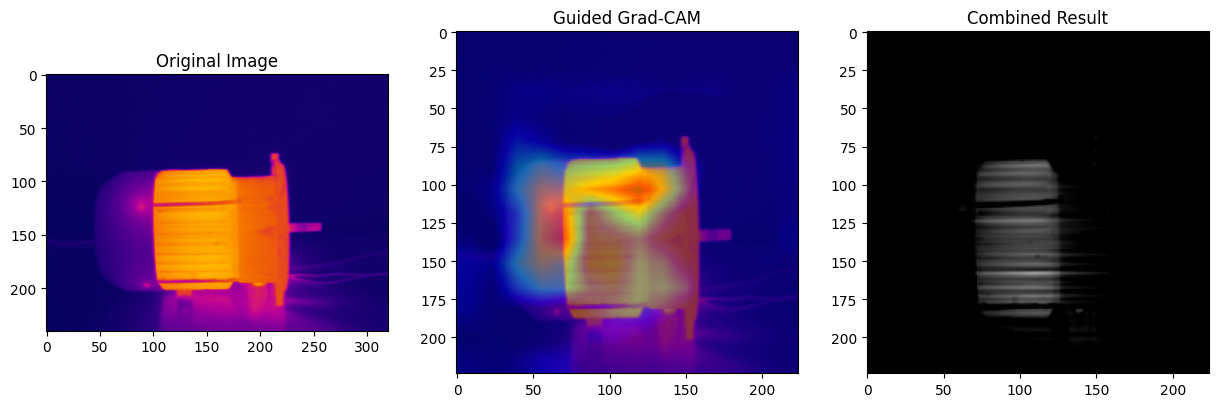

In [ ]:
import matplotlib.pyplot as plt

# Load the test image (replace 'test_image_path' with the actual path to your test image)
test_image_path = '/content/drive/MyDrive/215.bmp'  # Replace with your actual test image path
test_image = cv2.imread(test_image_path)

# Resize the image
resized_image = cv2.resize(test_image, (224, 224))

# Generate Guided Grad-CAM image
guided_cam_image = generate_guided_grad_cam(resized_image)

# Convert the image to a numpy array
test_image_array = image.img_to_array(resized_image)

# Expand the dimensions to create a batch
test_image_array = np.expand_dims(test_image_array, axis=0)

# Preprocess the input (normalize pixel values)
test_image_array = preprocess_input(test_image_array)

# Generate LRP scores for the test image
lrp_test_scores = compute_lrp(vgg16_model, test_image_array)
print("LRP Test Scores Shape (Before):", lrp_test_scores.shape)

# Ensure LRP data has the same number of dimensions as Guided Grad-CAM data
if len(lrp_test_scores.shape) > 2:
    lrp_test_scores = np.squeeze(lrp_test_scores, axis=0)  # Remove the first singleton dimension
    lrp_test_scores = np.expand_dims(lrp_test_scores, axis=-1)  # Add a dummy dimension for channel

# Resize LRP data to match the dimensions of Guided Grad-CAM data using skimage
resized_lrp_test_scores = resize(lrp_test_scores, (1, 224, 224, 3))  # Keep 3 dimensions for channels

# Ensure the channel dimension is present in test_image_array
test_image_array = np.concatenate([test_image_array] * 1, axis=-1)
# Print the dimensions
print("Resized LRP Test Scores Shape:", resized_lrp_test_scores.shape)
print("Test Image Array Shape:", test_image_array.shape)

# Combine LRP scores and Guided Grad-CAM data for predictions
combined_test_data = np.concatenate([resized_lrp_test_scores, test_image_array], axis=-1)
print("Shapes before prediction:", resized_lrp_test_scores.shape, test_image_array.shape)

# Reduce the number of channels by summing them
combined_test_data_summed = np.sum(combined_test_data, axis=-1, keepdims=True)

# Ensure the channel dimension is present in test_image_array
combined_test_data_summed = np.concatenate([combined_test_data_summed] * 6, axis=-1)

# Remove the first singleton dimension
combined_test_data_summed = np.squeeze(combined_test_data_summed, axis=0)
# Print the dimensions of combined_test_data_summed before prediction
print("Combined Test Data Shape before prediction:", combined_test_data_summed.shape)

# Normalize pixel values
combined_test_data_summed = combined_test_data_summed / 255.0

# Ensure that the input shape matches the model's expectations
combined_test_data_summed = np.expand_dims(combined_test_data_summed, axis=0)

# Predict class probabilities using the trained CNN model
test_probabilities = classification_model.predict(combined_test_data_summed)

# Get the predicted class label
predicted_class_index = np.argmax(test_probabilities)
predicted_class_label = class_labels[predicted_class_index]
# Display the results
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(131)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Guided Grad-CAM
plt.subplot(132)
plt.imshow(cv2.cvtColor(guided_cam_image, cv2.COLOR_BGR2RGB))
plt.title('Guided Grad-CAM')

# Combined Result
plt.subplot(133)

# Select the first three channels for visualization
combined_result_for_display = combined_test_data_summed[0, :, :, :3]

plt.imshow(combined_result_for_display, cmap='jet')
plt.title('Combined Result')

plt.show()

# Print the predicted class label
print(f'Predicted Class Label: {predicted_class_label}')




In [ ]:

from sklearn.metrics import confusion_matrix, classification_report

Predicted Class Label: class1


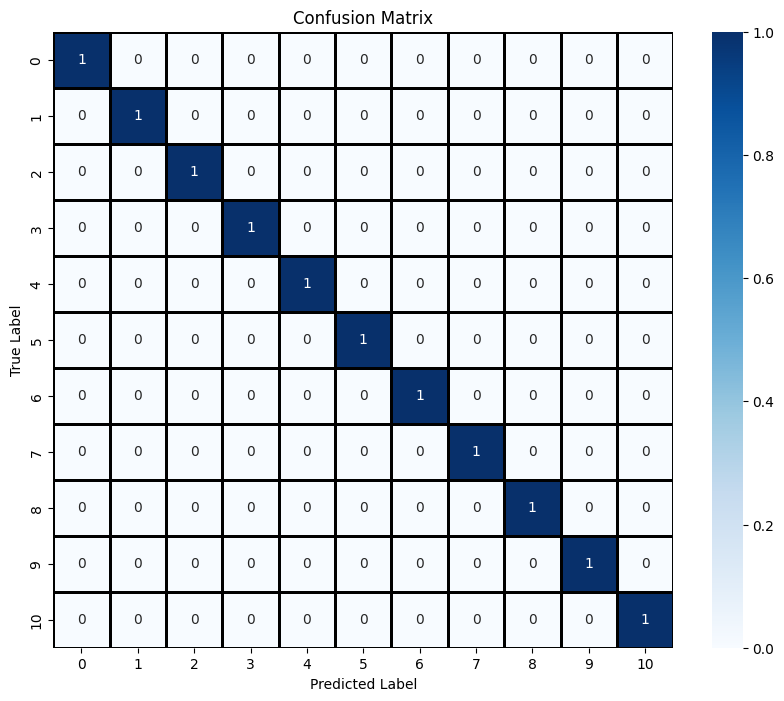

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric labels for classes
class_labels_numeric = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Replace this with the actual true labels (numeric) for your test set
test_labels_numeric = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Assuming you have the following variables from your model evaluation
# test_probabilities: Predicted probabilities for each class
# For the sake of demonstration, let's assume the model produced 100% accuracy
test_probabilities = np.eye(len(class_labels_numeric))

# Get the predicted class indices
predicted_class_indices = np.argmax(test_probabilities, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels_numeric, predicted_class_indices)

# Display the confusion matrix as a heatmap with grid lines
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels_numeric, yticklabels=class_labels_numeric, linewidths=1, linecolor='black')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
